In [2]:
%load_ext autoreload
%autoreload 2

# Correlate RBS to Hfq binding: Reis et al. 2020 - "FS" dataset

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from common import load_df_Reis
import sys


sns.set_style('whitegrid')

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

__package__ = os.path.basename(module_path)

# Load data

In [5]:
top_dir = os.path.join('data', '25_analyse_RBS_data_FS')
fn = os.path.join('data', 'RBS_Calculator', 'sb0c00394_si_003.xlsx')
excel_file = pd.ExcelFile(fn)

df = load_df_Reis(excel_file, 'FS')

# df


Shape of dataframe: (16779, 102)


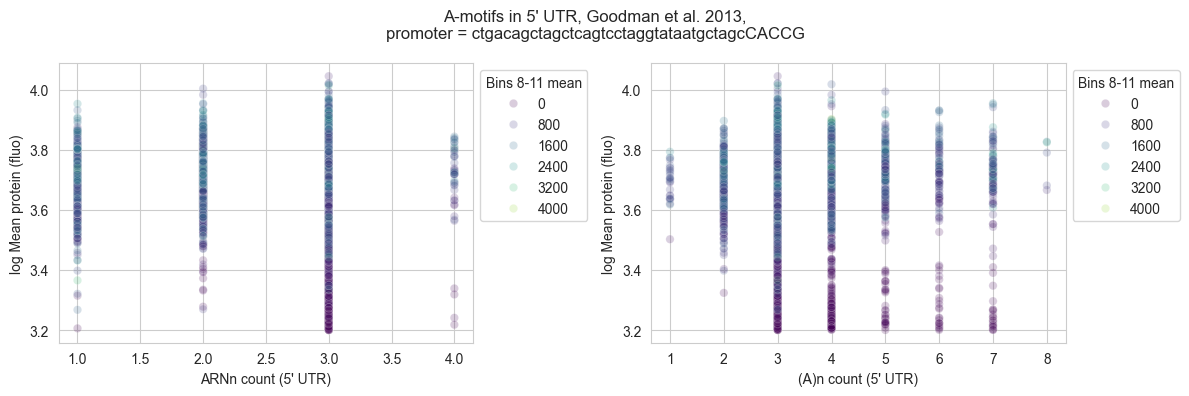

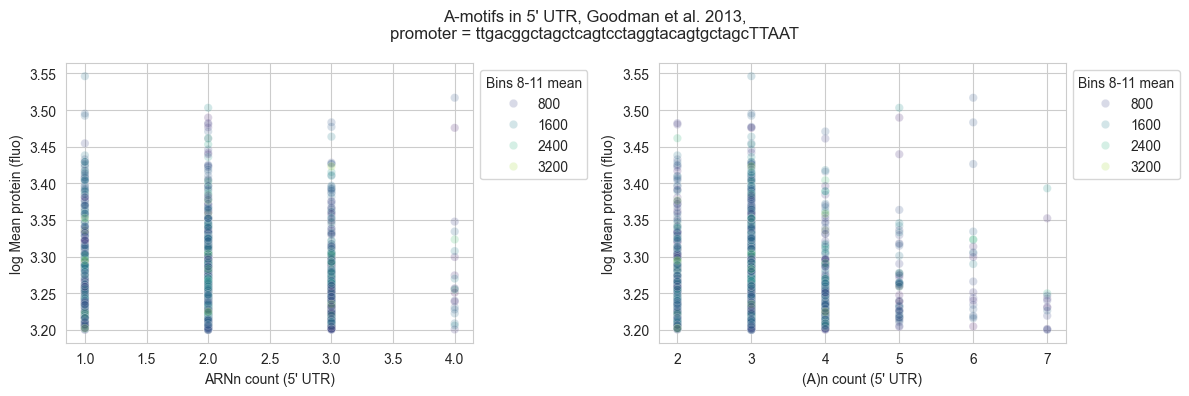

In [31]:
df['log TRANSL.RATE'] = np.log10(df['TRANSL.RATE'])
df['Bins 8-11 mean'] = df[['BIN8', 'BIN9', 'BIN10', 'BIN11']].mean(axis=1)
df_G = df[df['DATASET'] == 'Goodman_Science_2013']
# p_choice_id = 0
hue = 'Bins 8-11 mean'
k_sort = 'RNA'  # '(A)n count (RBS)'
for p_choice_id in range(df_G['PROMOTER'].nunique()):
    p_choice = sorted(df_G['PROMOTER'].unique())[p_choice_id]

    # k_sort = hue
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    g = sns.scatterplot(df_G[df_G['PROMOTER'] == p_choice].sort_values(k_sort, ascending=True), 
                    x="ARNn count (5' UTR)",
                    y='log Mean protein (fluo)', 
                    # hue="ARNn count (RBS)", 
                    hue=hue,
                    alpha=0.2,
                    palette='viridis', ax=axs[0])
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
    g = sns.scatterplot(df_G[df_G['PROMOTER'] == p_choice].sort_values(k_sort, ascending=True), 
                    x="(A)n count (5' UTR)",
                    y='log Mean protein (fluo)', 
                    # hue="(A)n count (RBS)", 
                    hue=hue,
                    alpha=0.2,
                    palette='viridis', ax=axs[1])
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
    plt.suptitle(f"A-motifs in 5' UTR, Goodman et al. 2013,\npromoter = {p_choice}")
    plt.tight_layout()
    plt.savefig(os.path.join(top_dir, f'motif_effect_Goodman_p{p_choice_id}.png'), dpi=300)


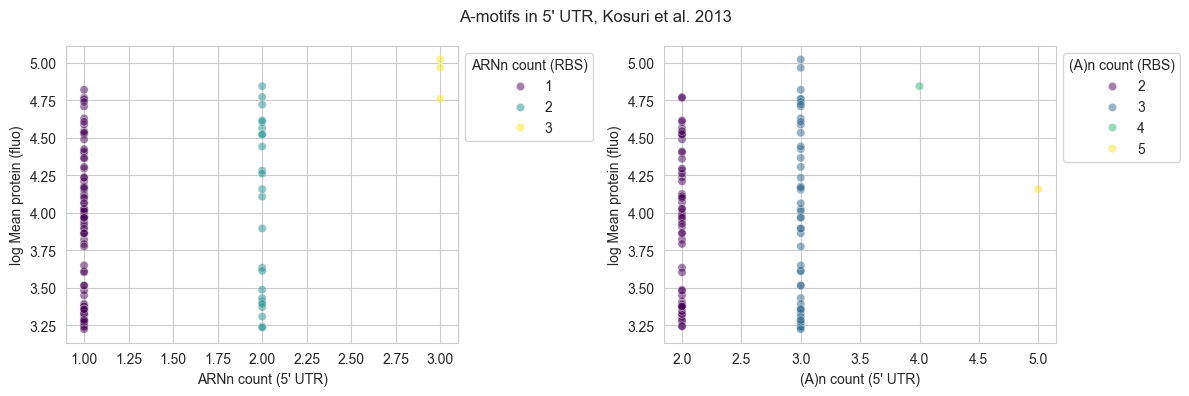

In [31]:
df_K = df[df['DATASET'] == 'Kosuri_PNAS_2013']
p_choice = sorted(df_K['PROMOTER'].unique())[0]

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
g = sns.scatterplot(df_K[df_K['PROMOTER'] == p_choice].sort_values('(A)n count (RBS)', ascending=True), 
                x="ARNn count (5' UTR)",
                y='log Mean protein (fluo)', hue="ARNn count (RBS)", alpha=0.5,
                palette='viridis', ax=axs[0])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g = sns.scatterplot(df_K[df_K['PROMOTER'] == p_choice].sort_values('(A)n count (RBS)', ascending=True), 
                x="(A)n count (5' UTR)",
                y='log Mean protein (fluo)', hue="(A)n count (RBS)", alpha=0.5,
                palette='viridis', ax=axs[1])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.suptitle("A-motifs in 5' UTR, Kosuri et al. 2013")
plt.tight_layout()
plt.savefig(os.path.join(top_dir, 'motif_effect_Kosuri.png'), dpi=300)